# Introdução

**Exercício da Aula 3**

Disciplina: EELT-7023 - Introdução ao Aprendizado de Máquina

Discente: Robson Guedes

E-mail: robson.guedes@ufpr.br


<font color="blue">Respostas e/ou comentários de minha autoria em AZUL.
</br> A Parte 2 foi feita no final do documento.</font>

---



# Representação do modelo

## Objetivo

- Aprender a implementar o modelo $f_{w,b} (x)$ para regressão linear com uma variável

## Ferramentas

Nesse código, você usará:
- NumPy, uma biblioteca popular para cálculos matriciais, etc
- Matplotlib, uma biblioteca popular para gerar figuras com dados

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Definição do Problema

Nesse código, você usará um exemplo de motivação baseado na previsão de tensão sobre um resistor.

Usaremos para isso um conjunto de dados com apenas 2 amostras - um valor de corrente de 0.2 A que resultou numa tensão de 21 V e um valor de 4.5 A que resultou numa tensão de 430 V. Essas duas amostras de dados contituem nosso *conjunto de dados de treinamento*.

| Corrente (A)     | Tensão (V) |
| -------------------| ------------------------ |
| 0.2               | 21                      |
| 4.5               | 430                      |

Queremos ajustar um modelo de regressão linear a partir desses dois pontos, para que seja possível então estimar a tensão sobre o resistor para outros valores de corrente.


Rodar a célula de código abaixo para criar as variáveis `x_trein` e `y_trein`. Os dados são armazenados em NumPy arrays de uma dimensão.

In [43]:
# x_train é a variável de entrada (corrente em Àmperes)
# y_train é a variável alvo (tensão em Volts)
x_trein = np.array([0.2, 4.5])
y_trein = np.array([21.0, 430.0])
print(f"x_trein = {x_trein}")
print(f"y_trein = {y_trein}")

x_trein = [0.2 4.5]
y_trein = [ 21. 430.]


### Número de amostras de treinamento `m`

Usaremos `m` para denotar o número de amostras de treinamento. Numpy arrays têm o parâmetro `.shape`. Nesse contexto, `x_train.shape` retorna uma tupla com uma entrada para cada dimensão. `x_train.shape[0]` é o comprimento da array (primeiro elemento presente na tupla), conforme mostrado abaixo.

In [44]:
# m é o número de amostras de treinamento
print(f"x_trein.shape: {x_trein.shape}")
m = x_trein.shape[0]
print(f"O número de amostras de treinamento é: {m}")

x_trein.shape: (2,)
O número de amostras de treinamento é: 2


É possível também utilizar o função em Python `len()`, conforme abaixo.

In [45]:
m = len(x_trein)
print(f"O número de amostras de treinamento é: {m}")

O número de amostras de treinamento é: 2


### Amostra de treinamento `x_i, y_i`

Usaremos (x$^{(i)}$, y$^{(i)}$) para denotar a $i-$ésima amostra de treinamento. Uma vez que a Linguagem Python tem 0 como índice inicial, (x$^{(0)}$, y$^{(0)}$) é (0.2, 21.0) e (x$^{(1)}$, y$^{(1)}$) é (4.5, 430.0).

A i-ésima posição da Numpy array `x_trein` é acessada utilizando o comando `x_trein[i]`, onde `i` denota a posição desejada.


Veja o código abaixo.

In [46]:
i = 1 # Mude esse valor para 1 para ver (x^1, y^1)

x_i = x_trein[i]
y_i = y_trein[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = (4.5, 430.0)


### Plotando os dados (gerando uma figura que mostra os dados)

Você pode plotar os dois pontos usando a função `scatter()` presente na biblioteca `matplotlib`, conforme mostrado abaixo.
- Os argumentos `marker` e `c` mostram os pontos como 'x' vermelhos (o padrão são pontos azuis).

Você pode usar outras funções da biblioteca `matplotlib` para definir o título e os rótulos dos eixos

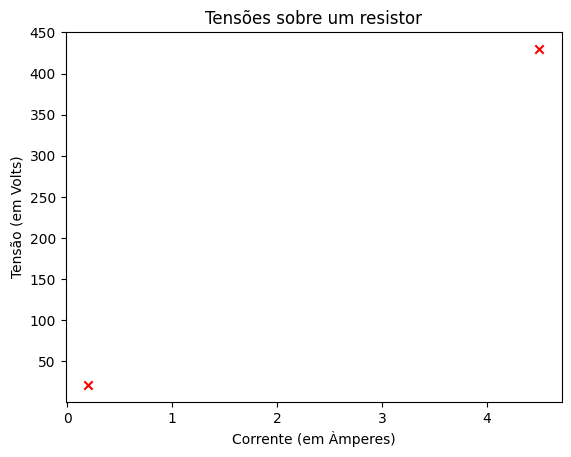

In [47]:
# Plotando os pontos dos dados
plt.scatter(x_trein, y_trein, marker='x', c='r')
# Ajustando o título:
plt.title("Tensões sobre um resistor")
# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.show()

## Implementando um modelo

O modelo de função para regressão linear (que é a função que faz o mapeamento de `x` para `y`) é representado por

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

A fórmula acima nos mostra a equação da reta: diferentes valores para $w$ e $b$ levam a diferentes retas. <br/> <br/> <br/> <br/> <br/>


Vamos tentar ganhar mais intuição usando o código abaixo. Vamos começar com $w = 0$ e $b = 100$.

**OBS: Você pode retornar à célula abaixo para ajustar diferentes valores para os parâmetros w e b do modelo**

<font color="blue">Resposta: foram alterados os valores de w e b para 95 e 0, respectivamente, para adequação da reta aos pontos no plot.</font>

In [55]:
w = 95
b = 0
print(f"w: {w}")
print(f"b: {b}")

w: 95
b: 0


Agora, vamos computar o valor $f_{w,b}(x^{(i)})$ para os dois dados que temos. Você pode explicitamente escrever:

para $x^{(0)}$, `f_wb = w * x[0] + b`

para $x^{(1)}$, `f_wb = w * x[1] + b`

Para uma grande quantidade de dados, isso pode ser demasiadamente repetitivo. Ao invés disso, você pode usar um loop do tipo `for` conforme mostrado na função `calcula_saida_do_modelo` abaixo.
> **OBS**: O argumento `(ndarray (m,))` descreve uma Numpy array de n dimensões da forma (m,). `(scalar)` descreve um argumento sem dimensões, apenas uma magnitude.  
> **OBS**: `np.zero(n)` retorna uma numpy array de 1 dimensão com $n$ valores   


In [49]:
def calcula_saida_do_modelo(x, w, b):
    """
    Calcula a previsão para um modelo na forma de reta
    Argumentos da função:
      x (ndarray (m,)): Conjunto de dados com m amostras
      w,b (escalar)   : Parâmetros do modelo
    Retorna
      y (ndarray (m,)): Previsão de saída
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m): # estrutura 'for' em Python
        f_wb[i] = w * x[i] + b

    return f_wb

Agora vamos chamar a função `calcula_saida_do_modelo` e plotar o resultado

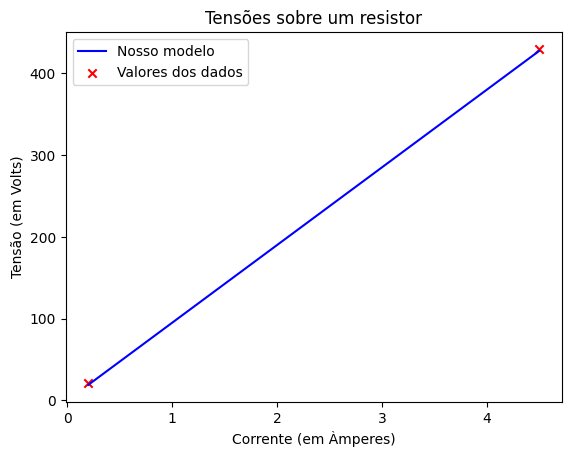

In [56]:
f_wb_calculado = calcula_saida_do_modelo(x_trein, w, b,)

# Plotando a previsão feita pelo modelo
plt.plot(x_trein, f_wb_calculado, c='b',label='Nosso modelo')

# Plotando os dados medidos
plt.scatter(x_trein, y_trein, marker='x', c='r',label='Valores dos dados')

# Definindo o título
plt.title("Tensões sobre um resistor")
# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()


Como você pode ver, definindo $w = 0$ e $b = 100$ *não* resulta numa reta que se ajusta bem aos nossos dados.

### Desafio
Tente diferentes valores para $w$ e $b$. Quais seriam os melhores valores para esse conjunto de dados?
<br/><font color="blue">w=95 e b=0</font>

Qual seria uma possível interpretação física para o parâmetro $w$ nesse exemplo?
<br/><font color="blue">Em $f(w,b) = w * x + b$, o parâmetro $w$ representa a resistência do resistor, que, pela lei de Ohm é dada pelo produto entre tensão (V) e intensidade (A).

</font>


### Previsão

Agora que temos um modelo, podemos usá-lo para fazer uma previsão para um valor diferente de corrente. Vamos estimar a tensão para uma corrente de 2 A.


In [57]:
w = 95
b = 0
x_i = 2
tensao_para_2_amperes = w * x_i + b

print(f"{tensao_para_2_amperes:.0f} Volts")

190 Volts


# Parabéns!

Com este código, você aprendeu:
 - Que a Regressão Linear constrói um modelo que estabelece uma relação entre as características de entrada e a variável alvo de saída
     - No exemplo, a característica de entrada era a corrente e a variável alvo era a tensão sobre o resistor
     - Para uma simples regressão linear, o modelo tem dois parâmetros $w$ e $b$ cujos valores são ajustados usando um conjunto de dados de treinamento.
     - Uma vez que os parâmetros do modelo foram determinados, o modelo pode ser usado para fazer previsões (estimativas) para novos dados que ainda não haviam sido utilizados anteriormente

# <br/><font color="blue">Parte 2

Nessa seção foram inseridas as respostas às questões 1 e 2 da Parte 2.
</br> Para manter o código original com o mínimo de alterações, efetuei minhas alterações numa cópia do código logo abaixo.
</font>

In [58]:
# Parte 2
# R é a resistência dada na questão 1
R = 50  # ohms
b_2 = 0 # vamos começar assumindo que não há tensão sem que haja corrente

# Criação de um conjunto de dados de treinamento
x_trein_2 = np.array([0.5, 1.0, 2.0, 3.5])
y_trein_2 = R * x_trein_2

print(f"x_trein_2 = {x_trein_2}")
print(f"y_trein_2 = {y_trein_2}")

x_trein_2 = [0.5 1.  2.  3.5]
y_trein_2 = [ 25.  50. 100. 175.]


In [59]:
# m é o número de amostras de treinamento
print(f"x_trein.shape: {x_trein_2.shape}")
m_2 = x_trein_2.shape[0]
print(f"O número de amostras de treinamento é: {m}")

x_trein.shape: (4,)
O número de amostras de treinamento é: 2


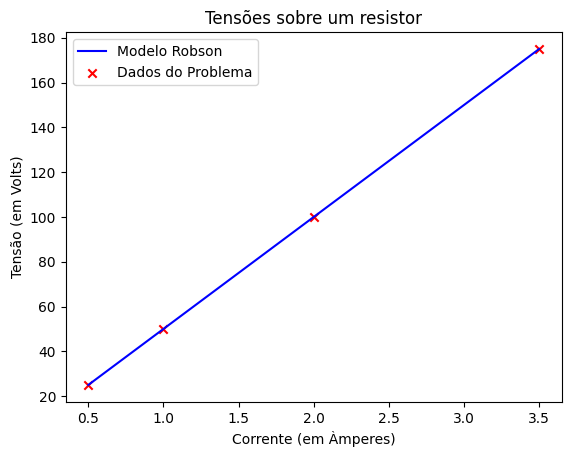

In [60]:
f_wb_2 = calcula_saida_do_modelo(x_trein_2, R, b_2,)

# Plotando a previsão feita pelo modelo
plt.plot(x_trein_2, f_wb_2, c='b',label='Modelo Robson')

# Plotando os dados medidos
plt.scatter(x_trein_2, y_trein_2, marker='x', c='r',label='Dados do Problema')

# Definindo o título
plt.title("Tensões sobre um resistor")
# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()